In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib import rcParams
%matplotlib inline

In [2]:
data = pd.read_csv('Combined Weather Data.csv')
data.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       1093 non-null   float64
 1   TM      1093 non-null   float64
 2   Tm      1093 non-null   float64
 3   SLP     1093 non-null   float64
 4   H       1093 non-null   float64
 5   VV      1093 non-null   float64
 6   V       1093 non-null   float64
 7   VM      1093 non-null   float64
 8   PM 2.5  1092 non-null   float64
dtypes: float64(9)
memory usage: 77.0 KB


In [6]:
data.fillna(method='ffill', inplace = True)

In [8]:
from sklearn.model_selection import train_test_split

X = data[['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM']]
y = data['PM 2.5']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.10, random_state = 42)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [10]:
model = Sequential()
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mse')

In [11]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_val,y_val),
          batch_size=128,epochs=400)

Epoch 1/400
8/8 [==============================] - 1s 68ms/step - loss: 7472.8901 - val_loss: 7369.1206
Epoch 2/400
8/8 [==============================] - 0s 7ms/step - loss: 6968.6670 - val_loss: 7360.7422
Epoch 3/400
8/8 [==============================] - 0s 7ms/step - loss: 7265.0938 - val_loss: 7312.9482
Epoch 4/400
8/8 [==============================] - 0s 6ms/step - loss: 7046.7492 - val_loss: 7290.6714
Epoch 5/400
8/8 [==============================] - 0s 6ms/step - loss: 7086.0983 - val_loss: 7269.5449
Epoch 6/400
8/8 [==============================] - 0s 7ms/step - loss: 6749.5830 - val_loss: 7229.6069
Epoch 7/400
8/8 [==============================] - 0s 6ms/step - loss: 6894.7626 - val_loss: 7204.0952
Epoch 8/400
8/8 [==============================] - 0s 7ms/step - loss: 6859.0763 - val_loss: 7171.6978
Epoch 9/400
8/8 [==============================] - 0s 7ms/step - loss: 6731.8600 - val_loss: 7138.9546
Epoch 10/400
8/8 [==============================] - 0s 6ms/step - loss: 

In [12]:
y_pred = model.predict(X_val)

MAE: 36.231323260683
MSE: 2694.3720494283943
RMSE: 51.90734099747736
VarScore: 0.639808638416522


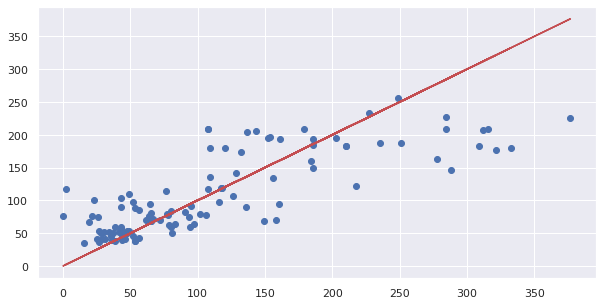

In [13]:
from sklearn import metrics
import numpy as np

print('MAE:', metrics.mean_absolute_error(y_val, y_pred))  
print('MSE:', metrics.mean_squared_error(y_val, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_val,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_val,y_pred)
# Perfect predictions
plt.plot(y_val,y_val,'r')

In [15]:
y = np.array(y_val)
y_p = np.array(y_pred).flatten()
df = pd.DataFrame({"Test Data": y, "Predicted Data": y_p})
df.head(100)

,Test Data,Predicted Data
0,33.791667,52.370628
1,30.333333,51.948792
2,97.291667,64.520142
3,26.583333,36.659176
4,284.795833,227.692261
...,...,...
95,154.037500,196.629974
96,82.833333,63.480015
97,93.500000,74.934715
98,120.208333,179.761276
